In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

Threefold split for Hyper-Parameters

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [ ]:
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.981
best n_neighbors: 11
test-set score: 0.965


Text(0, 0.5, 'validation accuracy')

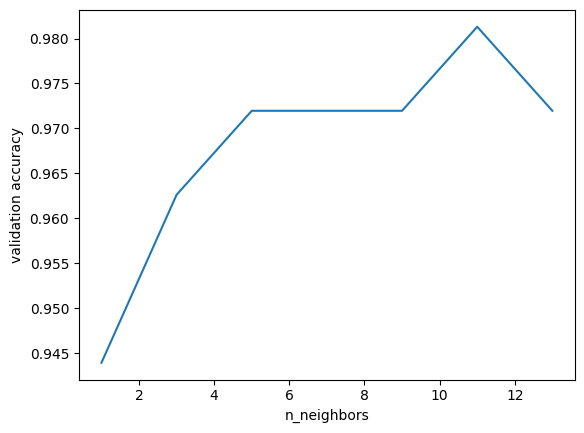

In [ ]:
import matplotlib.pyplot as plt
plt.plot(neighbors, val_scores)
plt.xlabel("n_neighbors")
plt.ylabel("validation accuracy")

Grid-Search with Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []
neighbors = np.arange(1, 5, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.953
best n_neighbors: 3
test-set score: 0.979


GridSearchCV

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)


param_grid = {'n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.972
best parameters: {'n_neighbors': 7}
test-set score: 0.965


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
print(results.shape)

(15, 31)


In [ ]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
results['split0_test_score']

,split0_test_score
0,0.930233
1,0.930233
2,0.953488
3,0.930233
4,0.930233
5,0.930233
6,0.906977
7,0.930233
8,0.906977
9,0.930233


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "300"



<Figure size 800x200 with 0 Axes>

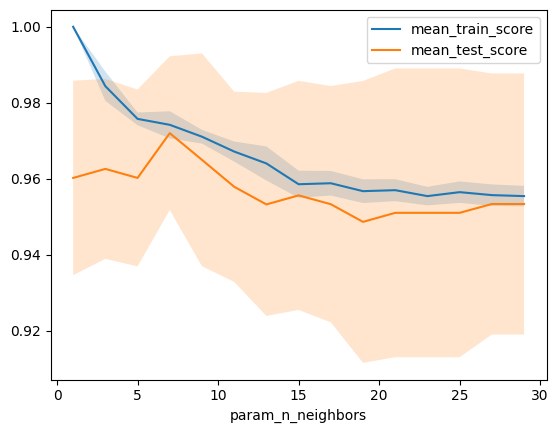

In [ ]:
plt.figure(figsize=(8, 2))

results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
#plt.savefig("grid_search_n_neighbors.png", bbox_inches='tight')
